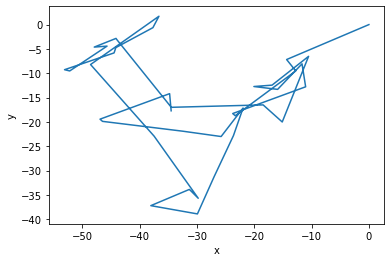

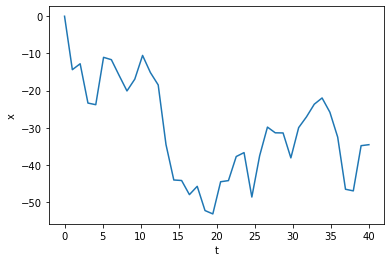

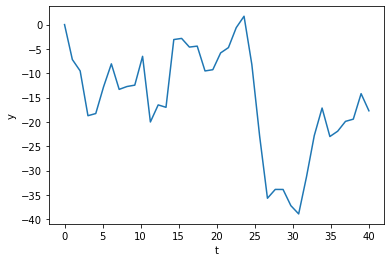

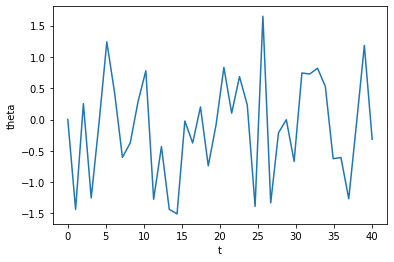

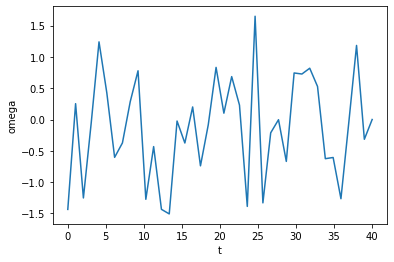

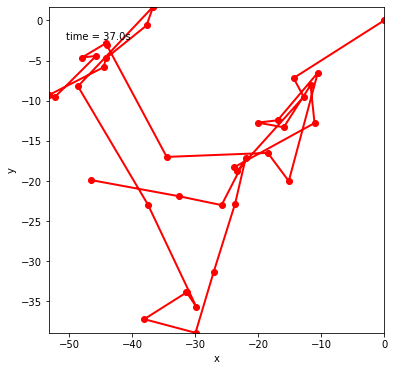

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import animation, rc
from IPython.display import HTML

# constants
N = 40 # sim length
Ts = 1 # time step
t = np.linspace(0, N*Ts, N) # total time

r = 5 # distance from 0 to A
l = 5 # distance from A to B
m = 5 # distance to C

# initial conditions
theta = np.zeros((N, 1))
x = np.zeros((N, 1))
y = np.zeros((N, 1))

# control vectors
Va = 10*np.random.rand(N, 1)
Vb = 10*np.random.rand(N, 1)

# EOM
def f(Va, Vb, t, theta, x, y):
    omega = (Vb - Va)/l
    Vc = (omega*((r + l)*np.cos(theta) - m*np.sin(theta)), omega*((r + l)*np.sin(theta) + m*np.cos(theta)))
    theta_new = omega/t
    x_new = x + Vc[0]*t
    y_new = y + Vc[1]*t
    return Vc, omega, theta_new, x_new, y_new
    
# simulation
Vc = np.zeros((N, 2))
omega = np.zeros((N, 1))

for i in range(N-1):
    Vc[i, :], omega[i], theta[i+1], x[i+1], y[i+1] = f(Va[i], Vb[i], Ts, theta[i], x[i], y[i])

# plot
plt.plot(x, y, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

plt.plot(t, theta)
plt.xlabel('t')
plt.ylabel('theta')
plt.show()

plt.plot(t, omega)
plt.xlabel('t')
plt.ylabel('omega')
plt.show()

# animation
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(np.min(x), np.max(x)), ylim=(np.min(y), np.max(y)))
ax.set_xlabel('x')
ax.set_ylabel('y')

line, = ax.plot([], [], 'ro-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = x[:i]
    thisy = y[:i]

    line.set_data(thisx, thisy)
    
    time_text.set_text(time_template % (i*Ts))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, range(1, len(x[1:]) - 1),
                              interval=Ts*1000, blit=True, init_func=init)
rc('animation', html='jshtml')
ani